In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('../data/clean/NPS_NATL_subset.csv')

In [3]:
df.head()

,Location,Workforce,NPS® Breakdown,respid2,NPS_Code,NPSCommentCleaned,NPSCommentLemmatised,NPSCommentPolarity,NPSCommentSubjectivity,OverallCommentCleaned,OverallCommentLemmatised,OverallCommentPolarity,OverallCommentSubjectivity
0,1763,Precinct,Promoter,7053157,2,staff in store in person close by when need them,"Staff in store, in person, close by when I nee...",0.000000,0.000000,was told the issue is more related to gmail th...,Was told the issue is more related to gmail th...,0.250000,0.45
1,832,Precinct,Promoter,6984308,2,adieb anbari was beyond helpful he answered al...,Adieb Anbari was beyond helpful . He answered ...,0.100000,0.600000,adieb was great would recommend him to help an...,Adieb was great I would recommend him to help ...,0.800000,0.75
2,288,Precinct,Promoter,6980586,2,quick and knowledgeable,Quick and knowledgeable,0.333333,0.500000,xyxyxz,xyxyxz,0.000000,0.00
3,168,Precinct,Promoter,6789897,2,he called back quickly within minutes and was ...,He called back quickly (within 5 minutes) and ...,0.414444,0.426667,appreciate his quick and knowledgeable response,Appreciate his quick and knowledgeable response.,0.333333,0.50
4,836,Precinct,Promoter,6896172,2,had really good experience thanks to your tech...,I had a really good experience thanks to your ...,0.450000,0.400000,ricky finished with his prior appt so he took ...,Ricky finished with his prior appt so he took ...,0.050000,0.15


In [4]:
df.describe()
df.NPSCommentCleaned = df.NPSCommentCleaned.astype(str)

In [5]:
lens=[len(i.split()) for i in df.NPSCommentCleaned]

(array([2.5844e+04, 6.7300e+02, 1.2700e+02, 4.2000e+01, 8.0000e+00,
        5.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. , 100.4, 199.8, 299.2, 398.6, 498. , 597.4, 696.8, 796.2,
        895.6, 995. ]),
 <BarContainer object of 10 artists>)

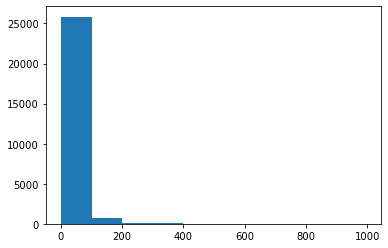

In [6]:
import matplotlib.pyplot as plt
plt.hist(lens)

In [7]:
#!pip install transformers

In [11]:
#for pytorch
import torch
import torch.nn as nn
device = torch.device("mps")

#for BERT
import transformers
from transformers import AutoModel, BertTokenizerFast
from transformers import BertForSequenceClassification 


In [12]:
# split into train, validation and test sets in the ration 70 : 15 : 15
from sklearn.model_selection import train_test_split

train_text, temp_text, train_labels, temp_labels = train_test_split(df['NPSCommentCleaned'], df['NPS_Code'], 
                                                                    random_state=2021, 
                                                                    test_size=0.3, 
                                                                    stratify=df['NPS_Code'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2021, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [31]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')
#bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3, output_attentions=False, output_hidden_states=False )
bert.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [32]:
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

(array([1.811e+04, 4.580e+02, 8.400e+01, 3.100e+01, 4.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. , 100.4, 199.8, 299.2, 398.6, 498. , 597.4, 696.8, 796.2,
        895.6, 995. ]),
 <BarContainer object of 10 artists>)

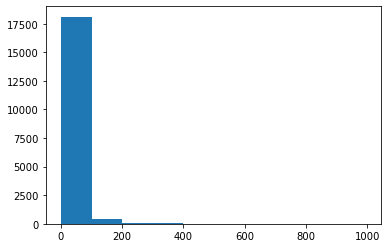

In [33]:
train_lens=[len(i.split()) for i in train_text]
plt.hist(train_lens)

As per the above graph, as most of the texts are having around 17 words, we would consider 17 as the padding length.

In [34]:
pad_len=100

In [35]:
# tokenize and encode sequences 
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = pad_len,
    padding=True,
    truncation=True
)

tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = pad_len,
    padding=True,
    truncation=True
)

tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = pad_len,
    padding=True,
    truncation=True
)

In [36]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [37]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 64 # was 64 -egs-

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [38]:
# freeze the BERT architecture

for param in bert.parameters():
    param.requires_grad = False

Below, we define the BERT architecture, i.e., define our own layers in addition to the actual BERT architecture

In [39]:
class BERT_architecture(nn.Module):

    def __init__(self, bert):
      
      super(BERT_architecture, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.2)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,3)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [40]:
# pass the pre-trained BERT to our define architecture
model = BERT_architecture(bert)

# push the model to GPU
model = model.to(device)

In [41]:
# optimizer from hugging face transformers
from torch.optim import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5)  # learning rate

In [42]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight(class_weight = "balanced",
                                        classes = np.unique(train_labels),
                                        y = train_labels 
                                     )
print("class weights are {} for {}".format(class_weights,np.unique(train_labels)))

class weights are [0.88857197 1.1434514  0.9999465 ] for [0 1 2]


In [43]:
#count of both the categories of training labels
pd.value_counts(train_labels)

0    7012
2    6231
1    5449
Name: NPS_Code, dtype: int64

In [44]:
#wrap class weights in tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push weights to GPU
weights = weights.to(device)

# define loss function
# add weights to handle the "imbalance" in the dataset
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

In [45]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [46]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # # Calculate elapsed time in minutes.
      # elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [47]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print('\nTraining Loss: {}'.format(train_loss))
    print('Validation Loss: {}'.format(valid_loss))


 Epoch 1 / 10


KeyboardInterrupt: 

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

In [ ]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pred = np.argmax(preds, axis = 1)
print(classification_report(test_y, pred))